In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f'\nScraping Page {i}')
    
    url = f'{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}'
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all('div', {'class': 'text_content'}):
        reviews.append(para.get_text())
    
    print(f'----> {len(reviews)} total reviews')


Scraping Page 1
----> 100 total reviews

Scraping Page 2
----> 200 total reviews

Scraping Page 3
----> 300 total reviews

Scraping Page 4
----> 400 total reviews

Scraping Page 5
----> 500 total reviews

Scraping Page 6
----> 600 total reviews

Scraping Page 7
----> 700 total reviews

Scraping Page 8
----> 800 total reviews

Scraping Page 9
----> 900 total reviews

Scraping Page 10
----> 1000 total reviews


In [3]:
data = pd.DataFrame()
data['Reviews'] = reviews

In [4]:
df = data.copy()
df.head()

,Reviews
0,✅ Trip Verified | Very impressed with BA. Chec...
1,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
2,Not Verified | I flew from Malaga via LHR to...
3,✅ Trip Verified | Milan to Miami return via L...
4,✅ Trip Verified | BA created a new low-cost s...


In [5]:
# df.to_csv('Data/BA_reviews.csv')

In [5]:
df.isna().sum()

Reviews    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
df['Reviews'][0]

'✅ Trip Verified | Very impressed with BA. Check in online was a little convoluted but once through that everything was great. We flew in standard economy and paid to choose our seats - this seems to be standard for all airlines now and how they keep initial prices down, but worth doing so we could sit together. Meals were excellent and drinks great. A simple water and biscuit on our short internal leg but still included and then 1 drink, 1 main meal and 1 snack on our 7 hour leg was better than our last trip on Emirates!! They gave out double drinks at drink service - that was 2 cokes and 2 beers for my partner and he was well pleased! Staff friendly, bags transfered and arrived in good condition and entertainment on route was good too. Will definitely choose BA again over other airlines.'

In [8]:
df.dropna(inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re


def preprocess_text(text):
    
    # Remove punctuation and special characters
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # join tokens back into single str
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

df['Cleaned_Reviews'] = df['Reviews'].apply(preprocess_text)

In [11]:
df.head()

,Reviews,Cleaned_Reviews
0,✅ Trip Verified | Very impressed with BA. Chec...,trip verified impressed ba check online little...
1,"✅ Trip Verified | LHR - SFO, LAS - LGW August...",trip verified lhr sfo la lgw august 2023 club ...
2,Not Verified | I flew from Malaga via LHR to...,verified flew malaga via lhr boston 4th may 20...
3,✅ Trip Verified | Milan to Miami return via L...,trip verified milan miami return via london wo...
4,✅ Trip Verified | BA created a new low-cost s...,trip verified ba created new lowcost subsidiar...


In [12]:
from textblob import TextBlob

In [13]:
df['Polarity'] = df['Cleaned_Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,Reviews,Cleaned_Reviews,Polarity
0,✅ Trip Verified | Very impressed with BA. Chec...,trip verified impressed ba check online little...,0.316865
1,"✅ Trip Verified | LHR - SFO, LAS - LGW August...",trip verified lhr sfo la lgw august 2023 club ...,0.096429
2,Not Verified | I flew from Malaga via LHR to...,verified flew malaga via lhr boston 4th may 20...,-0.029167
3,✅ Trip Verified | Milan to Miami return via L...,trip verified milan miami return via london wo...,-0.262500
4,✅ Trip Verified | BA created a new low-cost s...,trip verified ba created new lowcost subsidiar...,0.053426


In [14]:
df['Sentiment'] = df['Polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
df.head()

,Reviews,Cleaned_Reviews,Polarity,Sentiment
0,✅ Trip Verified | Very impressed with BA. Chec...,trip verified impressed ba check online little...,0.316865,positive
1,"✅ Trip Verified | LHR - SFO, LAS - LGW August...",trip verified lhr sfo la lgw august 2023 club ...,0.096429,positive
2,Not Verified | I flew from Malaga via LHR to...,verified flew malaga via lhr boston 4th may 20...,-0.029167,negative
3,✅ Trip Verified | Milan to Miami return via L...,trip verified milan miami return via london wo...,-0.262500,negative
4,✅ Trip Verified | BA created a new low-cost s...,trip verified ba created new lowcost subsidiar...,0.053426,positive


In [41]:
df['Sentiment'].value_counts().reset_index()

,Sentiment,count
0,positive,634
1,negative,351
2,neutral,15


In [42]:
sent_df = df['Sentiment'].value_counts().reset_index()

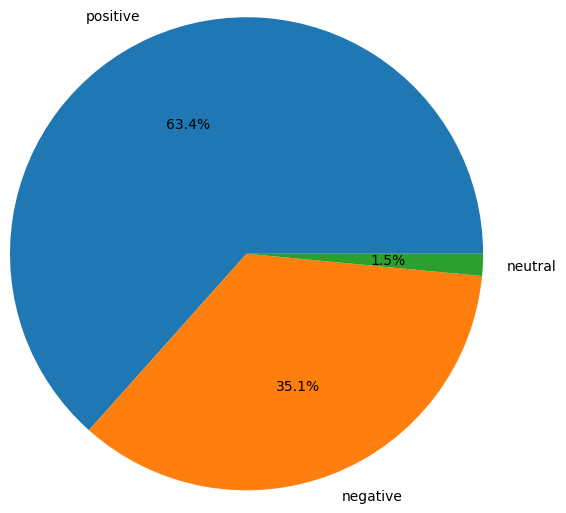

In [61]:
plt.pie(sent_df['count'], labels=sent_df['Sentiment'], autopct='%1.1f%%', pctdistance=0.6, radius=1.6)
plt.savefig('sentiment-analysis.png', bbox_inches='tight')
plt.show();

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [17]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Cleaned_Reviews'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

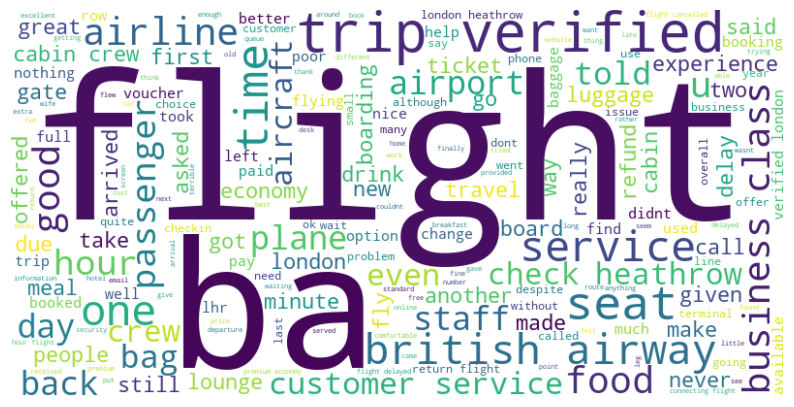

In [19]:
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['Cleaned_Reviews']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

#plt.savefig('wordcloud-frequent-words.png', bbox_inches='tight')
plt.show();

In [20]:
from collections import Counter

all_tokens = ' '.join(df['Cleaned_Reviews']).split()
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(20)
common_words

[('flight', 2193),
 ('ba', 1270),
 ('verified', 1004),
 ('trip', 898),
 ('seat', 842),
 ('service', 767),
 ('time', 645),
 ('hour', 583),
 ('london', 515),
 ('crew', 456),
 ('airline', 453),
 ('class', 445),
 ('food', 440),
 ('one', 437),
 ('good', 427),
 ('british', 426),
 ('airway', 420),
 ('business', 406),
 ('u', 399),
 ('staff', 397)]

In [21]:
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
word_freq_df

,Word,Frequency
0,flight,2193
1,ba,1270
2,verified,1004
3,trip,898
4,seat,842
5,service,767
6,time,645
7,hour,583
8,london,515
9,crew,456


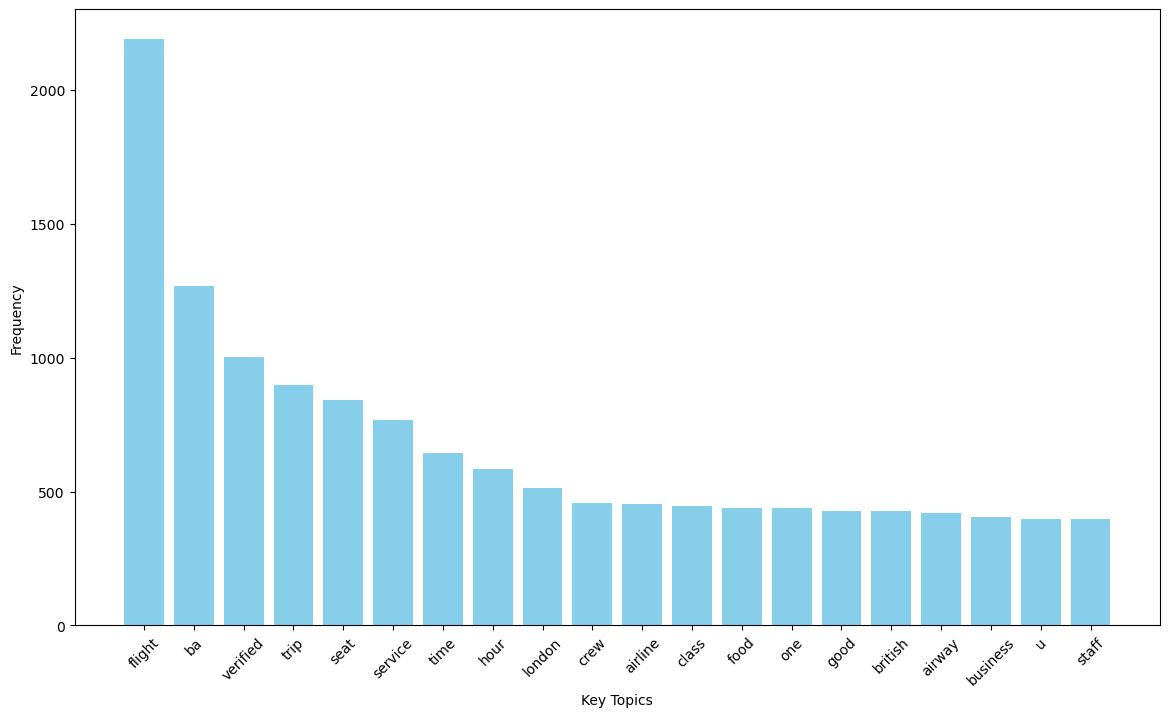

In [26]:
plt.figure(figsize=(14,8))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.xlabel('Key Topics')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# plt.savefig('key-topics.png', bbox_inches='tight')
plt.show();

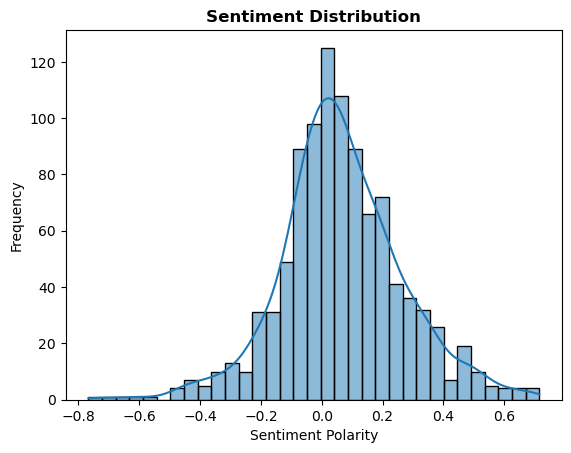

In [19]:
import seaborn as sns

sns.histplot(df['Sentiment'], kde=True)
plt.title('Sentiment Distribution', fontweight='bold')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.savefig('sentiment-distribution.png', bbox_inches='tight')
plt.show();

In [20]:
lda.components_

array([[ 0.20133269,  3.9633348 ,  0.200003  , ...,  2.19676956,
         0.20000104,  0.20274507],
       [ 3.90409689,  0.21718414,  0.20000397, ...,  0.2032962 ,
         0.20000139,  0.20157241],
       [ 0.200005  ,  0.20182012,  0.20001083, ...,  0.2000042 ,
         0.20000374,  0.20000715],
       [ 0.20603105,  0.2012179 ,  1.20005918, ...,  1.1999296 ,
         5.19737698,  0.20171211],
       [21.48853436,  5.41644304,  1.19992301, ...,  0.20000044,
         0.20261685,  9.19396326]])

In [21]:
vectorizer.get_feature_names_out()[200:300]

array(['addressed', 'adequate', 'adjacent', 'adjust', 'adjustable',
       'administration', 'admit', 'advance', 'advantage', 'advantages',
       'advertised', 'advice', 'advise', 'advised', 'advises', 'advising',
       'aer', 'aeroflot', 'aeroplane', 'affected', 'afford', 'afforded',
       'afraid', 'africa', 'african', 'afternoon', 'age', 'aged',
       'ageing', 'agent', 'agents', 'ages', 'aggressive', 'aging', 'ago',
       'agree', 'agreed', 'ahead', 'ai', 'aid', 'air', 'airborne',
       'airbridge', 'airbus', 'aircraft', 'aircrafts', 'aires', 'airfare',
       'airline', 'airlines', 'airplane', 'airplanes', 'airport',
       'airports', 'airside', 'airspace', 'airway', 'airways', 'aisle',
       'aisles', 'alaska', 'albeit', 'alcohol', 'alcoholic', 'alex',
       'alicante', 'allergies', 'allergy', 'alliance', 'allocated',
       'allocation', 'allow', 'allowance', 'allowed', 'allowing',
       'allows', 'alright', 'alternate', 'alternative', 'alternatives',
       'altogethe

In [77]:
feat_names = vectorizer.get_feature_names_out()

for index, topic in enumerate(lda.components_):
    top_topics = [feat_names[i] for i in topic.argsort()[-10:]]
    print(f'\nTopic {index + 1}:')
    print(top_topics)


Topic 1:
['food', 'cabin', 'economy', 'trip', 'service', 'seat', 'seats', 'ba', 'business', 'class']

Topic 2:
['service', 'london', 'did', 'british', 'airways', 'ba', 'trip', 'bag', 'flight', 'luggage']

Topic 3:
['drinks', 'flight', 'service', 'seat', 'attendant', 'flights', 'crew', 'food', 'ba', 'trip']

Topic 4:
['seat', 'service', 'cabin', 'time', 'food', 'ba', 'trip', 'crew', 'good', 'flight']

Topic 5:
['customer', 'cancelled', 'airways', 'hours', 'british', 'service', 'london', 'trip', 'ba', 'flight']
['customer', 'cancelled', 'airways', 'hours', 'british', 'service', 'london', 'trip', 'ba', 'flight']


In [29]:
from pptx import Presentation
from pptx.util import Inches

In [40]:
prs = Presentation()
slide_layout = prs.slide_layouts[5]

slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = 'Airline Reviews Analysis'

img_path = 'sentiment-distribution.png'
left = Inches(1)
top = Inches(2)
pic = slide.shapes.add_picture(img_path, left, top, width=Inches(4), height=Inches(3))

prs.save('airline_reviews_analysis.pptx')

In [42]:
df['Sentiment'].mean()

0.06542263900355648

In [78]:
feat_names = vectorizer.get_feature_names_out()

top_10_topics = []

for index, topic in enumerate(lda.components_):
    top_topics = [feat_names[i] for i in topic.argsort()[-10:]]
    top_10_topics.append(top_topics)
#     print(f'\nTopic {index + 1}:')
#     print(top_topics)
top_10_topics

[['food',
  'cabin',
  'economy',
  'trip',
  'service',
  'seat',
  'seats',
  'ba',
  'business',
  'class'],
 ['service',
  'london',
  'did',
  'british',
  'airways',
  'ba',
  'trip',
  'bag',
  'flight',
  'luggage'],
 ['drinks',
  'flight',
  'service',
  'seat',
  'attendant',
  'flights',
  'crew',
  'food',
  'ba',
  'trip'],
 ['seat',
  'service',
  'cabin',
  'time',
  'food',
  'ba',
  'trip',
  'crew',
  'good',
  'flight'],
 ['customer',
  'cancelled',
  'airways',
  'hours',
  'british',
  'service',
  'london',
  'trip',
  'ba',
  'flight']]